In [1]:
# Libraries
import tensorflow as tf
from keras.datasets import cifar10
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import numpy as np

# Tensorflow aliases
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.utils import plot_model

(X_train, y_train),(X_test, y_test) = cifar10.load_data()

# Convert to float32 for scaling
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize data by scaling by max
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encode target labels and reshape
y_train = np_utils.to_categorical(y_train.transpose()).reshape(50000,10)
y_test = np_utils.to_categorical(y_test.transpose()).reshape(10000,10)
input_shape = (32,32,3)

print(f"Training set: {len(X_train)}\nTesting set: {len(X_test)}")

def build_cnn2(activation='relu', kernel_size=(3,3), pool_size=(2,2), regularizer=None, lam=0.01, summarize=False, dropout=False, drop_prob1=0.2, drop_prob2=0.2):
  model = Sequential()
  
  if regularizer == None:
    # Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=kernel_size, activation=activation, input_shape=(32, 32, 3)))
    model.add(MaxPool2D(pool_size))

    model.add(Conv2D(filters=64, kernel_size=kernel_size, activation=activation))
    model.add(MaxPool2D(pool_size))
    if dropout:
      model.add(Dropout(drop_prob1))

    model.add(Conv2D(filters=128, kernel_size=kernel_size, activation=activation))
    model.add(MaxPool2D(pool_size))
    if dropout:
      model.add(Dropout(drop_prob2))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(512, activation=activation))
    if dropout:
      model.add(Dropout(drop_prob2))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    if summarize:
      model.build()
      model.summary()
    return model
  else:
    # Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=kernel_size, kernel_regularizer=regularizer(lam), activation=activation, input_shape=(32, 32, 3)))
    model.add(MaxPool2D(pool_size))

    model.add(Conv2D(filters=64, kernel_size=kernel_size, kernel_regularizer=regularizer(lam), activation=activation))
    model.add(MaxPool2D(pool_size))
    if dropout:
      model.add(Dropout(drop_prob1))

    model.add(Conv2D(filters=128, kernel_size=kernel_size, kernel_regularizer=regularizer(lam), activation=activation))
    model.add(MaxPool2D(pool_size))
    if dropout:
      model.add(Dropout(drop_prob2))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(512, activation=activation, kernel_regularizer=regularizer(lam)))
    if dropout:
      model.add(Dropout(drop_prob2))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    if summarize:
      model.build()
      model.summary()
    return model

# Helper functions
def show_acc(h, e):
  plt.plot(range(e), h.history['accuracy'], label='Training')
  plt.plot(range(e), h.history['val_accuracy'], label='Validation')
  plt.ylim([0, 1])
  plt.legend()
  plt.show()

def build_and_plot(activation='relu', kernel_size=(3,3), pool_size=(2,2), regularizer=None, lam=0.01, dropout=False, drop_prob1=0.2, drop_prob2=0.2, summarize=False, e=100, verbose=0):
  model = build_cnn2(activation=activation, kernel_size=kernel_size, pool_size=pool_size, regularizer=regularizer, lam=lam, dropout=dropout, drop_prob1=drop_prob1, drop_prob2=drop_prob2, summarize=summarize)
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=e, verbose=verbose)
  show_acc(history, e)
  print("Max accuracy: ", np.max(history.history['accuracy']))
  print("Min accuracy: ", np.min(history.history['accuracy']))
  print("Test performance ", model.evaluate(X_test, y_test))
  return model, history

Training set: 50000
Testing set: 10000


## Same dropout probabilities

2023-04-17 22:29:33.093237: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


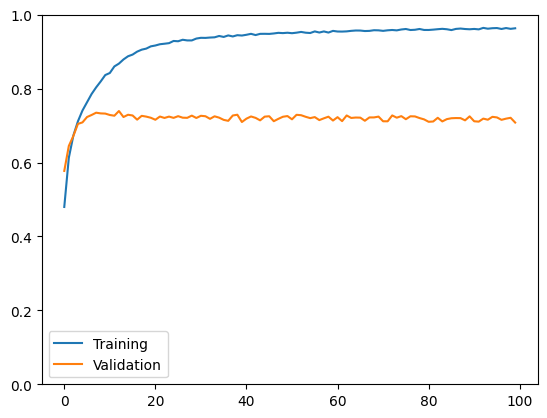

Max accuracy:  0.9642800092697144
Min accuracy:  0.47975999116897583
313/313 [==============================] - 1s 3ms/step - loss: 2.1989 - accuracy: 0.7081
Test performance  [2.1989264488220215, 0.7081000208854675]


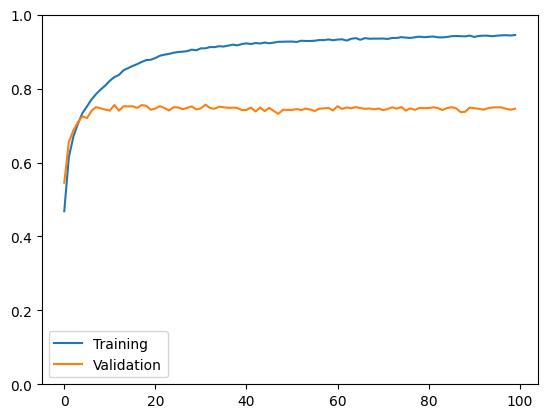

Max accuracy:  0.944920003414154
Min accuracy:  0.4681600034236908
313/313 [==============================] - 1s 3ms/step - loss: 1.4189 - accuracy: 0.7456
Test performance  [1.4188770055770874, 0.7455999851226807]


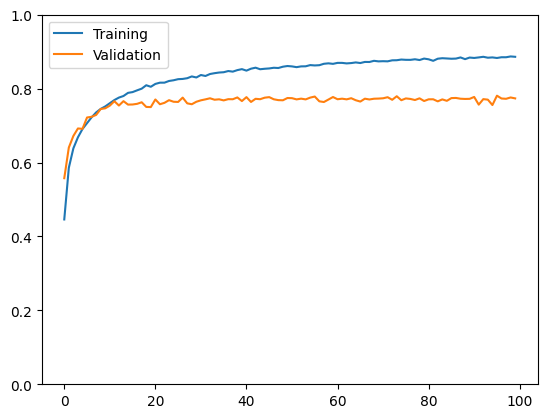

Max accuracy:  0.8870000243186951
Min accuracy:  0.4459399878978729
313/313 [==============================] - 1s 3ms/step - loss: 0.8080 - accuracy: 0.7735
Test performance  [0.807950496673584, 0.7735000252723694]


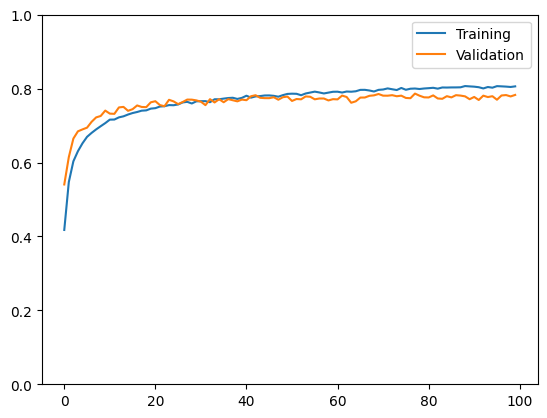

Max accuracy:  0.806879997253418
Min accuracy:  0.41756001114845276
313/313 [==============================] - 1s 3ms/step - loss: 0.6571 - accuracy: 0.7829
Test performance  [0.657109260559082, 0.7828999757766724]


TypeError: build_and_plot() got an unexpected keyword argument 'drop_pro1b'

In [2]:
# drop_05, drop_05_history = build_and_plot(dropout=True, drop_prob1=0.05, drop_prob2=0.05, e=100)
# drop_1, drop_1_history = build_and_plot(dropout=True, drop_prob1=0.1, drop_prob2=0.1, e=100)
# drop_2, drop_2_history = build_and_plot(dropout=True, drop_prob1=0.2, drop_prob2=0.2, e=100)
# drop_3, drop_3_history = build_and_plot(dropout=True, drop_prob1=0.3, drop_prob2=0.3, e=100)
drop_4, drop_4_history = build_and_plot(dropout=True, drop_prob1=0.4, drop_prob2=0.4, e=100)

## Smaller then larger dropout probabilites

In [ ]:
# from keras.backend import image_data_format
# image_data_format()

In [ ]:
drop_s05, drop_s05_history = build_and_plot(dropout=True, drop_prob1=0.05, drop_prob2=0.1, e=100)
drop_s1, drop_s1_history = build_and_plot(dropout=True, drop_prob1=0.1, drop_prob2=0.2, e=100)
drop_s2, drop_s2_history = build_and_plot(dropout=True, drop_prob1=0.2, drop_prob2=0.3, e=100)
drop_s3, drop_s3_history = build_and_plot(dropout=True, drop_prob1=0.4, drop_prob2=0.5, e=100)

## Larger then smaller dropout probabilities

In [ ]:
drop_b05, drop_b05_history = build_and_plot(dropout=True, drop_prob1=0.1, drop_prob2=0.05, e=100)
drop_b1, drop_b1_history = build_and_plot(dropout=True, drop_prob1=0.2, drop_prob2=0.1, e=100)
drop_b2, drop_b2_history = build_and_plot(dropout=True, drop_prob1=0.3, drop_prob2=0.2, e=100)
drop_b3, drop_b3_history = build_and_plot(dropout=True, drop_prob1=0.4, drop_prob2=0.3, e=100)